# Visualize Conv Layers

In [1]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow.keras import models
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 10s 0us/step


In [4]:
n_classes = 10
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [7]:
D = X_train.shape[1:]
print(D)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Conv2D(32, kernel_size=3, input_shape=D, padding='same'))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(2))
cnn.add(Flatten())
cnn.add(Dense(n_classes, activation='softmax'))

cnn.summary()

(32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 

2022-04-11 16:18:18.822318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:18.823007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:18.823512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:18.824349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:18.824847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not op

In [8]:
tf.test.is_gpu_available()

2022-04-11 16:18:21.505907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:21.506557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:21.507699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:21.508582: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-11 16:18:21.508621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1594] Could not ident

True

In [9]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = cnn.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, Y_test))

2022-04-11 16:18:42.040916: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-11 16:19:44.552771: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-04-11 16:19:45.410990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-11 16:19:46.247982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-04-11 16:19:46.808852: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-11 16:19:46.810775: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-11 16:19:46.810827: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-04-11 16:19:46.811417: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-11 16:19:46.811497: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


391/391 [==============================] - 10s 18ms/step - loss: 1.4029 - accuracy: 0.5051 - val_loss: 1.6953 - val_accuracy: 0.4316
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 1.0152 - accuracy: 0.6450 - val_loss: 1.4154 - val_accuracy: 0.5112
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 0.8915 - accuracy: 0.6890 - val_loss: 1.0140 - val_accuracy: 0.6504
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 0.8184 - accuracy: 0.7175 - val_loss: 0.9244 - val_accuracy: 0.6789
Epoch 5/10
391/391 [==============================] - 6s 16ms/step - loss: 0.7657 - accuracy: 0.7362 - val_loss: 0.9041 - val_accuracy: 0.6878
Epoch 6/10
391/391 [==============================] - 6s 15ms/step - loss: 0.7200 - accuracy: 0.7500 - val_loss: 1.0494 - val_accuracy: 0.6589
Epoch 7/10
391/391 [==============================] - 6s 16ms/step - loss: 0.6783 - accuracy: 0.7661 - val_loss: 1.2235 - val_accuracy: 0.5877
Epoch 8/1

In [79]:
def show_filters(model, layer_nr, test_im):
    output =  model.layers[layer_nr].output
    activation_model = models.Model(inputs=model.input, outputs=output)
    test_im = test_im.reshape(1,32,32,-1)
    num_filters = output.shape[3]
    activation = activation_model.predict(test_im)
    fig, axs = plt.subplots(4, int(num_filters/4), figsize=(15,15))
    for i in range(0,num_filters):
        rowindex = i // 8
        colindex = i % 8
        data = activation[0, :, :, i-1]
        axs[rowindex, colindex].matshow(data, cmap='Greys')


32
32
32
32
32
32
32
32


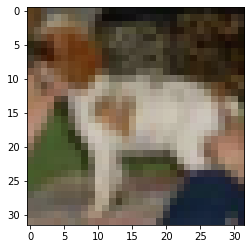

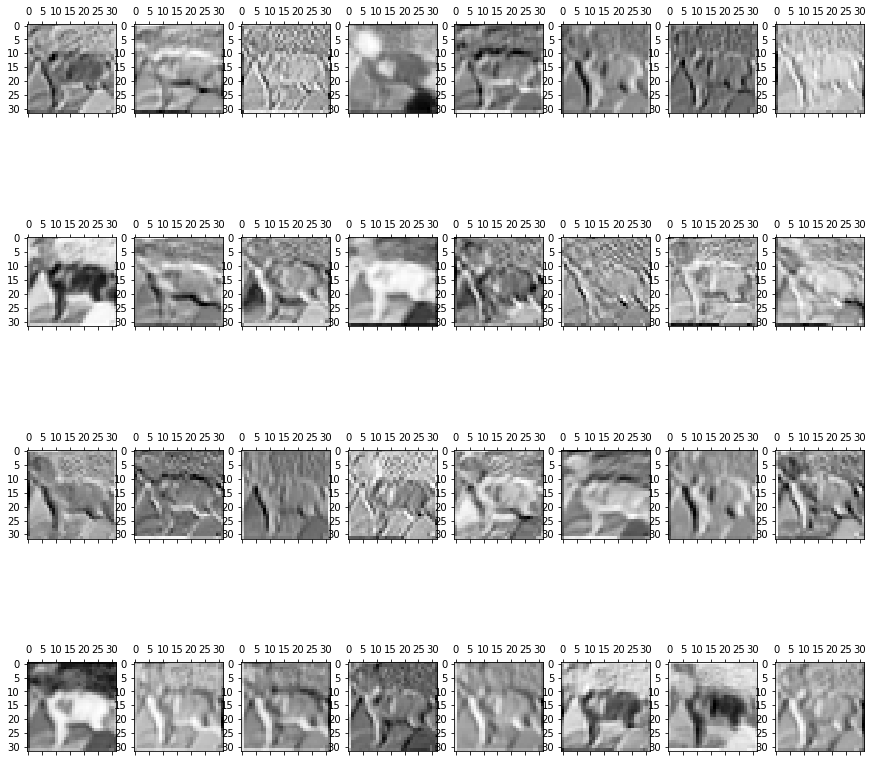

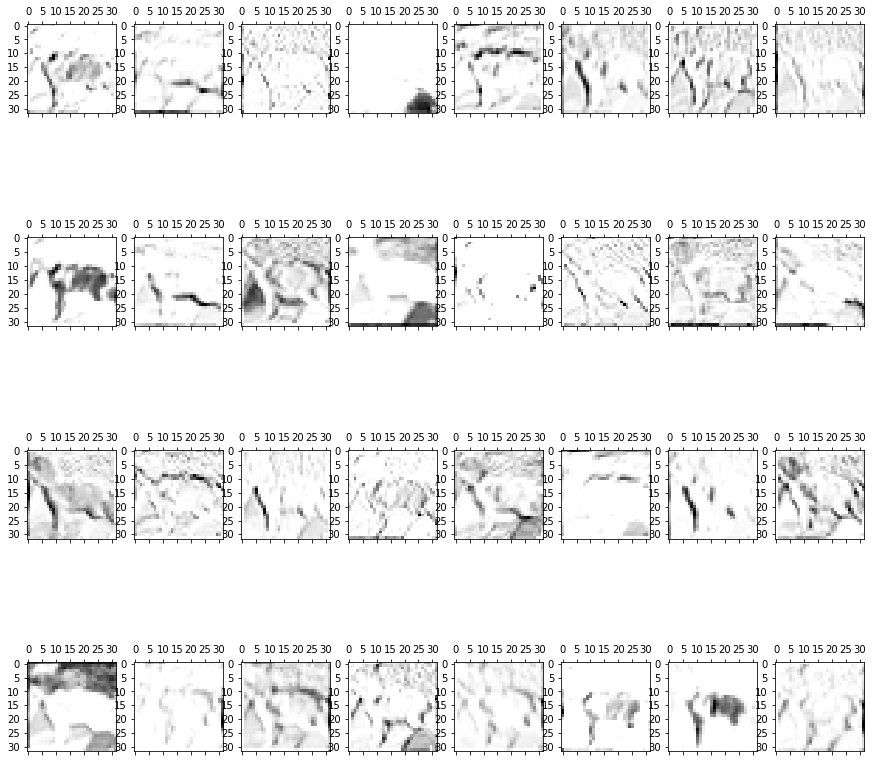

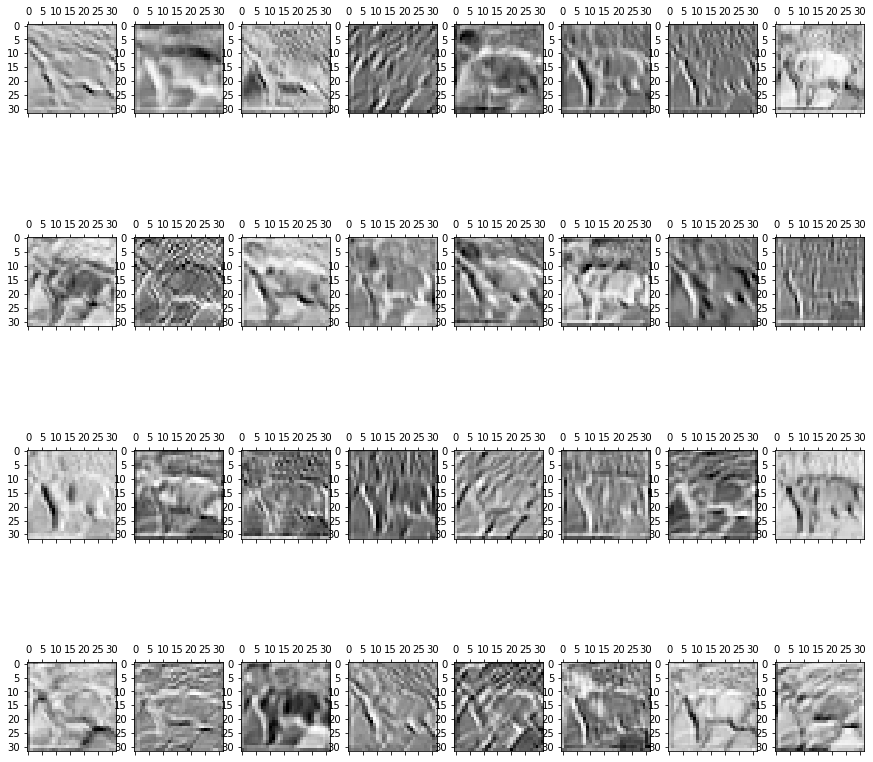

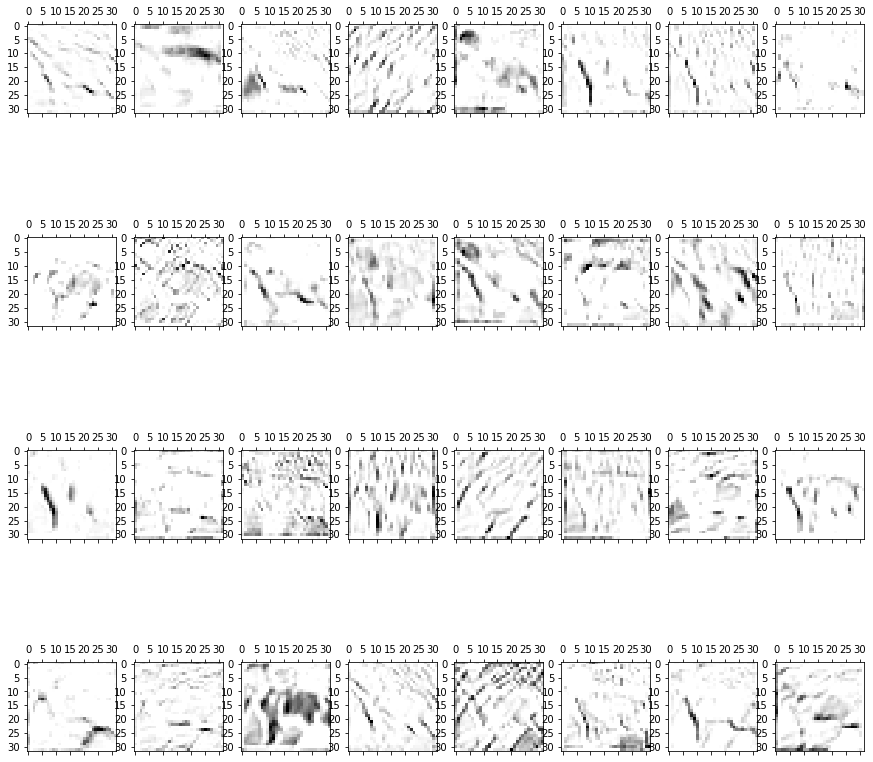

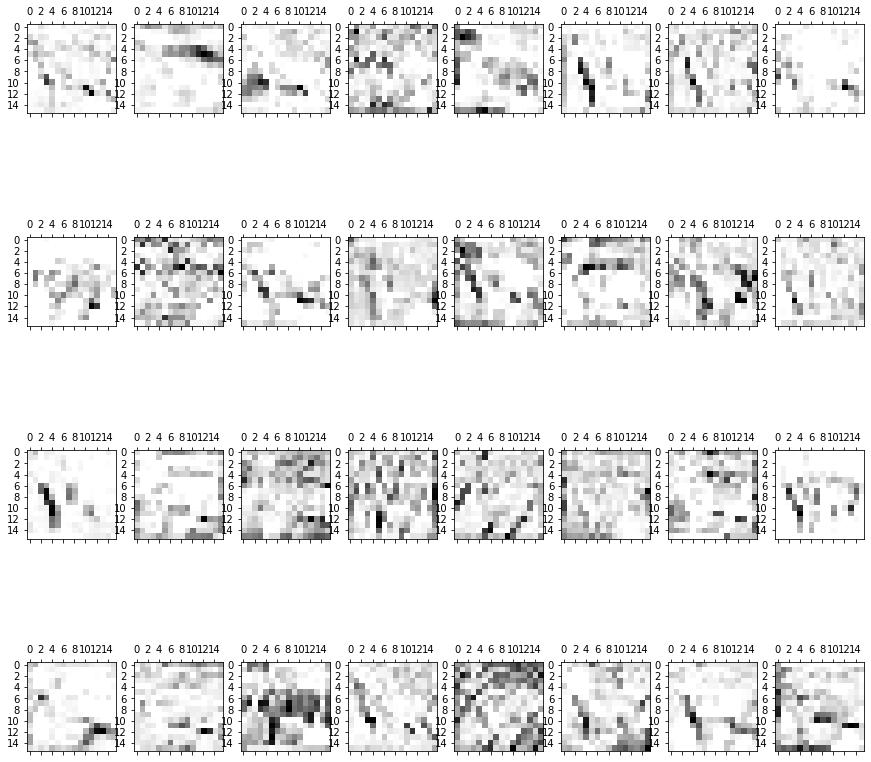

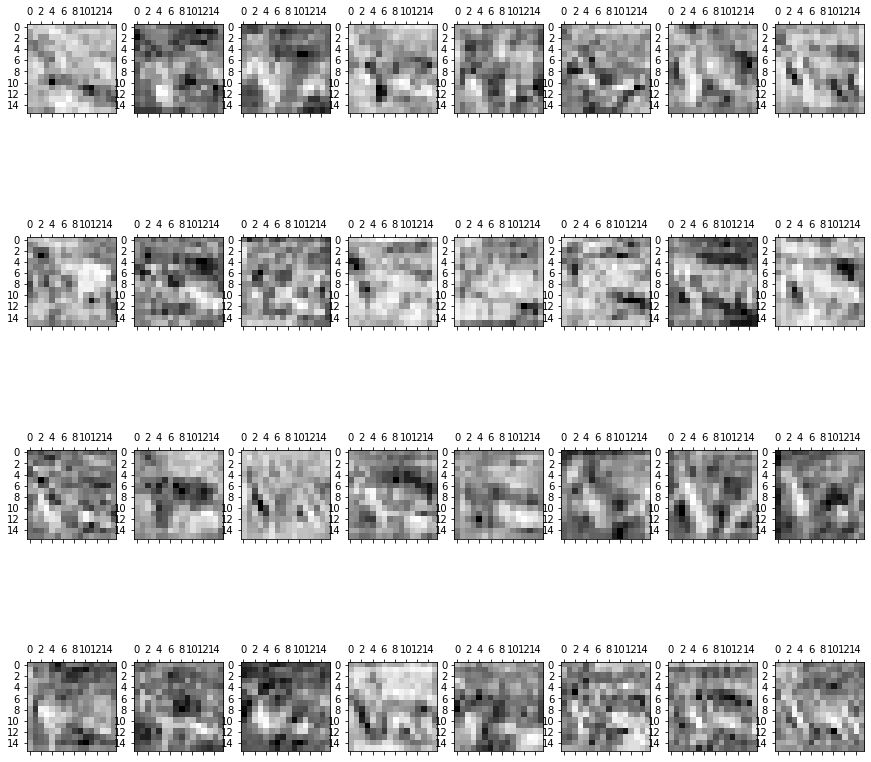

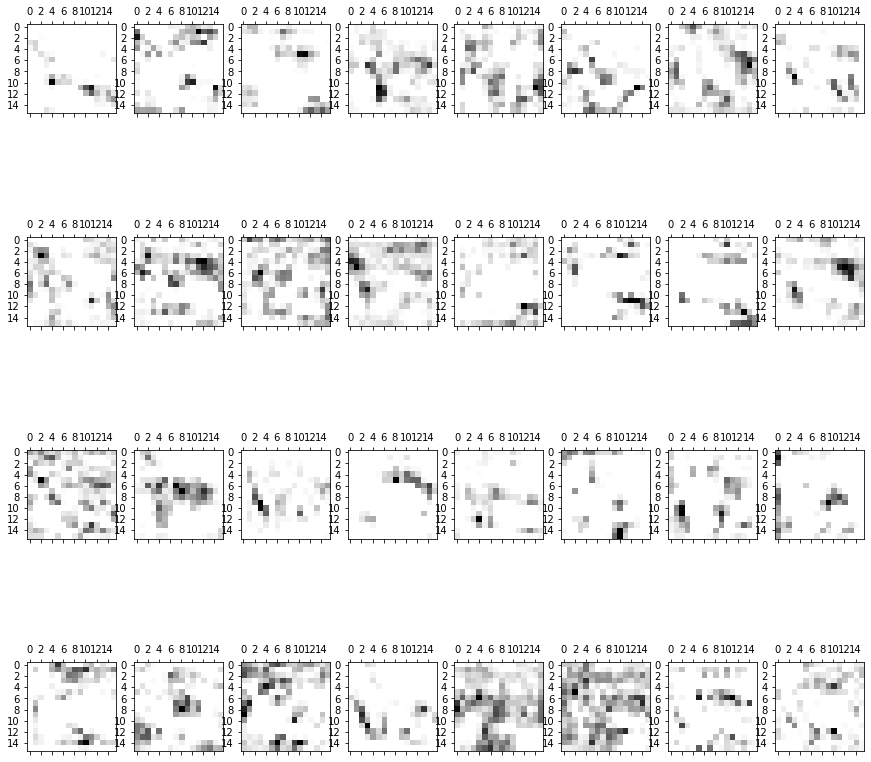

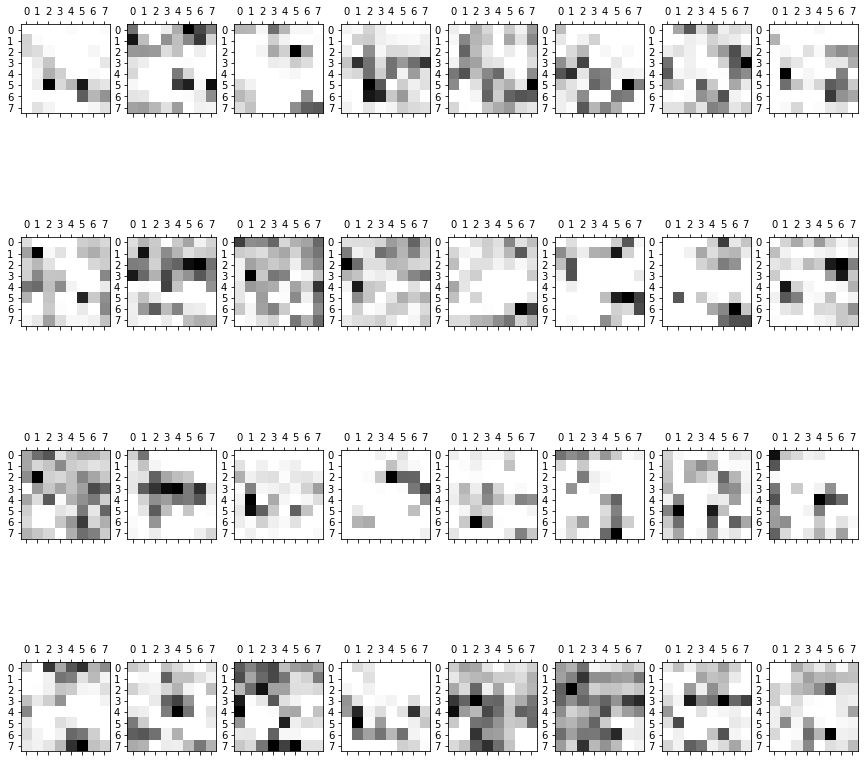

In [86]:
image_index = 12
plt.imshow(X_test[image_index])
for i in [0,2,3,5,6,7,9,10]:
    show_filters(cnn, i, X_test[image_index])